# Evaluate Pretrained `super-image` Models

---

[Github](https://github.com/eugenesiow/super-image) | All Models @ [huggingface.co](https://huggingface.co/models?filter=super-image) | All Datasets @ [huggingface datasets](https://huggingface.co/datasets?filter=task_ids:other-other-image-super-resolution)

---

Notebook to evaluate pretrained `super-image` models with common image super resolution datasets.

The notebook is structured as follows:
* Setting up the Environment
* Loading the dataset
* Evaluating the Model (Running Inference)

## Setting up the Environment

#### Install the library

We will install the `super-image` and huggingface `datasets` library using `pip install`.

In [1]:
!pip install -qq datasets super-image

     |████████████████████████████████| 542 kB 6.7 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 76 kB 4.1 MB/s 
     |████████████████████████████████| 243 kB 46.7 MB/s 
     |████████████████████████████████| 118 kB 44.0 MB/s 
     |████████████████████████████████| 51.0 MB 50 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Loading the dataset

We download the [`Set5`]() dataset using the huggingface `datasets` library. You can explore more super resolution datasets [here](https://huggingface.co/datasets?filter=task_ids:other-other-image-super-resolution). 

In [3]:
from datasets import load_dataset

dataset = load_dataset('eugenesiow/Set5', 'bicubic_x2', split='validation')

Reusing dataset set5 (/root/.cache/huggingface/datasets/set5/bicubic_x2/1.0.0/e0c6fb24ad5c097bcc602e43704e322b619ce96a3bb212e085cabdafae69727f)


The following code will show the the first image (high resolution and the low resolution (half sized) images) from the dataset in the notebook.

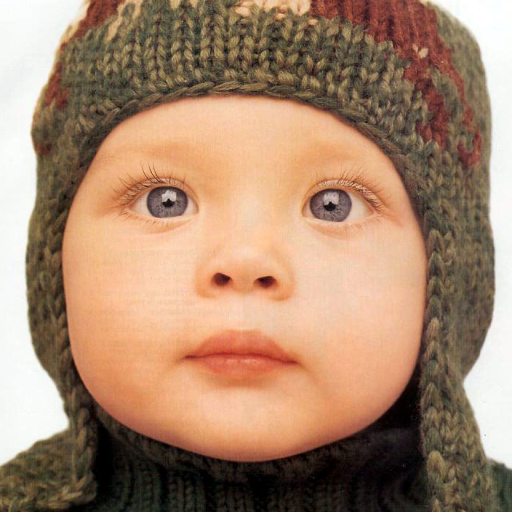

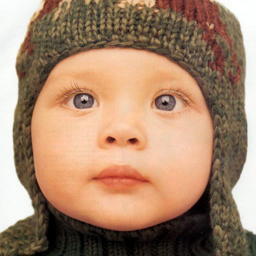

In [4]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(cv2.imread(dataset[0]["hr"]))
cv2_imshow(cv2.imread(dataset[0]["lr"]))

## Evaluating the Model (Running Inference)

To evaluate the a model for the [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Quality_estimation_with_PSNR) and [SSIM](https://en.wikipedia.org/wiki/Structural_similarity#Algorithm) metrics we run the following code:

* `EvalDataset(dataset)` converts the dataset to an evaluation dataset that can be fed in to a PyTorch dataloader.
* `EdsrModel.from_pretrained` - Download and load a small, pre-trained deep-learning model to the `model` variable. You can replace this with [other](https://huggingface.co/models?filter=super-image) pretrained models.
* `EvalMetrics().evaluate(model, eval_dataset)` - Run the evaluation on the `eval_dataset` using the `model`.

In [5]:
from super_image import EdsrModel
from super_image.data import EvalDataset, EvalMetrics

eval_dataset = EvalDataset(dataset)
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
EvalMetrics().evaluate(model, eval_dataset)

Downloading:   0%|          | 0.00/188 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.51M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


  0%|          | 0/5 [00:00<?, ?it/s]

scale:2     eval psnr: 38.020786   ssim: 0.960653


We can see from the output that the PSNR for this model on this dataset is `38.02` and the SSIM is `0.9607`.